# Test C++ Code from Python 

 The tests will build a test program, ``stepper`` or ``planner``, run the program, ba visualize the results.


In [1]:
from testlib import * 

In [2]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from cpptest import * 

from pytplan import Joint
from pathlib import Path

root_dir = Path('../../..')
test_dir = root_dir/'cmake'/'src'/'test'
cli_dir = test_dir/'system'
unit_dir = test_dir/'unit'

test_files_dir = Path('../../..')/'src'/'test_data'

!ls {test_files_dir}

stepper_file_test.txt


In [3]:
!ls test_dir
cp = CPPPlanner(unit_dir)

cp.make()

ls: test_dir: No such file or directory
-- DOXYGEN_EXECUTABLE = '/usr/local/bin/doxygen'
-- Found Boost: /usr/local/lib/cmake/Boost-1.79.0/BoostConfig.cmake (found version "1.79.0") found components: program_options filesystem system 
-- Found Boost: /usr/local/lib/cmake/Boost-1.79.0/BoostConfig.cmake (found version "1.79.0") found components: system filesystem 
-- Configuring done


Doxygen build started
FastCRC source dir: /Users/eric/Documents/proj/tplan/src/FastCRC


-- Generating done
-- Build files have been written to: /Users/eric/Documents/proj/tplan/cmake
Consolidate compiler generated dependencies of target libhost
[  3%] Building CXX object src/target/host/CMakeFiles/libhost.dir/HostHardware.cpp.o
[  6%] Linking CXX static library liblibhost.a
[ 10%] Built target libhost
Consolidate compiler generated dependencies of target libfastcrc
[ 20%] Built target libfastcrc
Consolidate compiler generated dependencies of target libplanner


/Library/Developer/CommandLineTools/usr/bin/ranlib: file: liblibhost.a(host.cpp.o) has no symbols
/Library/Developer/CommandLineTools/usr/bin/ranlib: file: liblibhost.a(host.cpp.o) has no symbols


[ 24%] Building CXX object src/planner/CMakeFiles/libplanner.dir/Hardware.cpp.o
[ 27%] Building CXX object src/planner/CMakeFiles/libplanner.dir/block.cpp.o
[ 31%] Building CXX object src/planner/CMakeFiles/libplanner.dir/debug.cpp.o
[ 34%] Building CXX object src/planner/CMakeFiles/libplanner.dir/joint.cpp.o
[ 37%] Building CXX object src/planner/CMakeFiles/libplanner.dir/loop.cpp.o
[ 41%] Building CXX object src/planner/CMakeFiles/libplanner.dir/messageprocessor.cpp.o
[ 44%] Building CXX object src/planner/CMakeFiles/libplanner.dir/planner.cpp.o
[ 48%] Building CXX object src/planner/CMakeFiles/libplanner.dir/segment.cpp.o
[ 51%] Building CXX object src/planner/CMakeFiles/libplanner.dir/stepper.cpp.o
[ 55%] Building CXX object src/planner/CMakeFiles/libplanner.dir/types.cpp.o
[ 58%] Linking CXX static library liblibplanner.a
[ 62%] Built target libplanner
Consolidate compiler generated dependencies of target test_planner
[ 65%] Building CXX object src/test/unit/CMakeFiles/test_planne

In [4]:
# Write a test file for the stepper test. 
# SHould not generally re-run this, because you'll have to change the checksums in the associated test. 
if False:
    def write_test_file():
        from pathlib import Path
        from random import random, randint

        signs = [1,1,1]

        with open(test_files_dir/'stepper_file_test.txt', 'w') as f:
            for i in range(100):
                for axis in (0,1):
                    signs[axis] = -signs[axis] if random() < .1 else signs[axis] # change direction_state 10% of the time
                x1 = signs[0]*int(random() < .90)*randint(0,10000)
                x2 = signs[1]*int(random() < .90)*randint(0,10000)
                x3 = signs[2]*int(random() < .90)*randint(0,10000)

                f.write(f"{x1} {x2} {x3}\n")




In [5]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from cpptest import * 

##
## Compare Python  blocks to CPP planner blocks
###

# Create the Python blocks
j = Joint(5000, 50_000)
s = Segment(0, j)

blocks = [
    Block(x=1000, v_0=0, v_1=0, joint=j, segment=s).plan(),       # A
    Block(x=1000, v_0=2500, v_1=2500, joint=j, segment=s).plan(), # B
    Block(x=1000, v_0=5000, v_1=5000, joint=j, segment=s).plan(), # C
    Block(x=200, v_0=5000, v_1=5000, joint=j, segment=s).plan(),  # D
    Block(x=1, v_0=5000, v_1=5000, joint=j, segment=s).plan(),    # E
    Block(x=1000, v_0=5000, v_1=0, joint=j, segment=s).plan(),    # F
    Block(x=1000, v_0=0, v_1=5000, joint=j, segment=s).plan(),    # G
    Block(x=400, v_0=5000, v_1=0, joint=j, segment=s).plan(),     # H
    Block(x=400, v_0=0, v_1=5000, joint=j, segment=s).plan(),     # I
    Block(x=150, v_0=5000, v_1=0, joint=j, segment=s).plan(),     # J
    Block(x=150, v_0=0, v_1=5000, joint=j, segment=s).plan()      # K
]
    
blocks = dict([ (k,v) for k,v in zip("ABCDEFGHIJK", blocks)])

# Run the test_planner program to get the c++ planner blocks
tp = TestPlanner(unit_dir)
tp.make()
z = tp.run()
cblocks = z['low level block']['output']

n_diffs = 0
for cb in cblocks:
    b = blocks[cb['_tag']].asdict()
    for k, v in cb.items():
        diffs = compare_blocks(cb, b)
        n_diffs += len(diffs)
        if diffs:
            print(cb['_tag'], diffs)
                
if n_diffs == 0:
    print("No differences")

Consolidate compiler generated dependencies of target libhost
[ 10%] Built target libhost
[ 20%] Built target libfastcrc
Consolidate compiler generated dependencies of target libplanner
[ 62%] Built target libplanner
Consolidate compiler generated dependencies of target test_planner
[100%] Built target test_planner
running ['../../../cmake/src/test/unit/test_planner', '[json]']
No differences


In [6]:

#
# Compare segments
#
tp = TestPlanner(unit_dir)
tp.make()
s1 = tp.load_segment('basic_segment_1')

s2 = Segment(  0, s1.joints, s1.move)
s2.plan()

diffs = compare_seg(s1, s2)
assert len(diffs) == 0, diffs

[ 10%] Built target libhost
[ 20%] Built target libfastcrc
[ 62%] Built target libplanner
[100%] Built target test_planner
running ['../../../cmake/src/test/unit/test_planner', '[json]']


In [7]:
tp = TestPlanner(unit_dir)
tp.make()
s1 = tp.load_segment('basic_segment_2')

s2 = Segment(  0, s1.joints, s1.move)
s2.plan()

diffs = compare_seg(s1, s2)

assert len(diffs) == 0, diffs

[ 10%] Built target libhost
[ 20%] Built target libfastcrc
[ 62%] Built target libplanner
[100%] Built target test_planner
running ['../../../cmake/src/test/unit/test_planner', '[json]']


In [8]:
#
# Compare the python planner to the CPP planner. 
#
LARGE = 1000
small = 1

j = Joint(5000, 50_000)
joints = [j,j]

moves = ([LARGE,small],[small,LARGE])


cp = CPPPlanner(cli_dir)
cp.make()
sl_p, sl_c = cp.compare_planner(joints, moves)
print(sl_p)
print(sl_c)


[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
Consolidate compiler generated dependencies of target planner
[ 86%] Building CXX object src/test/system/CMakeFiles/planner.dir/planner.cpp.o
[ 90%] Linking CXX executable planner
[ 90%] Built target planner
Consolidate compiler generated dependencies of target stepper
[ 95%] Building CXX object src/test/system/CMakeFiles/stepper.dir/stepper.cpp.o
[100%] Linking CXX executable stepper
[100%] Built target stepper
Pyp Time:  8586 μs 2146 μs per block
[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
Consolidate compiler generated dependencies of target planner
[ 90%] Built target planner
Consolidate compiler generated dependencies of target stepper
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-pj']
CPP Time:  349 μs 87 μs per block
  0 0.0000 0.2996|[0        250 100  ↗5000      500 100  ↘250    100      19] [0          0 0  

[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Pyp Time:  4685 μs 390 μs per block
[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-pj']
CPP Time:  294 μs 24 μs per block


(None, None)

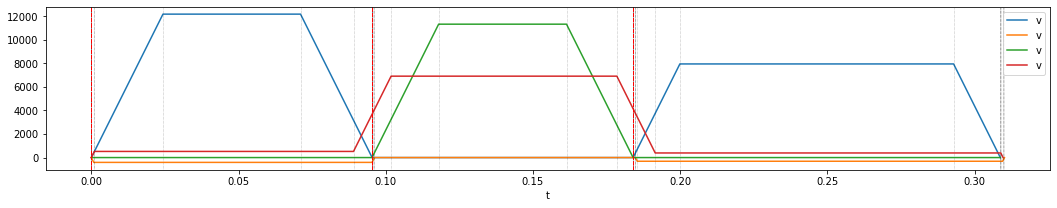

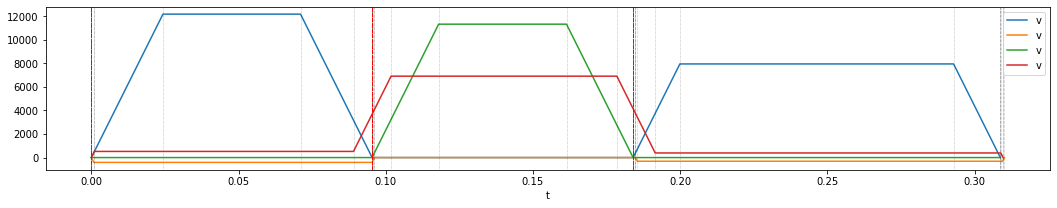

In [15]:

moves = [
    [864, -39, 0, 61],
    [0, 0, 747, 594],
    [864, -39, 0, 61]
]
cp = CPPPlanner(cli_dir)
cp.make()
sl_p, sl_c = cp.compare_planner([j,j,j,j], moves, report = True)
sl_p.plot(), sl_c.plot()


[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 31%] Building CXX object src/planner/CMakeFiles/libplanner.dir/planner.cpp.o
[ 36%] Linking CXX static library liblibplanner.a
[ 81%] Built target libplanner
[ 86%] Linking CXX executable planner
[ 90%] Built target planner
[ 95%] Linking CXX executable stepper
[100%] Built target stepper
Pyp Time:  29492 μs 2107 μs per block
[ 13%] Built target libhost
[ 27%] Built target libfastcrc
Consolidate compiler generated dependencies of target libplanner
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-pj']
CPP Time:  697 μs 50 μs per block


(None, None)

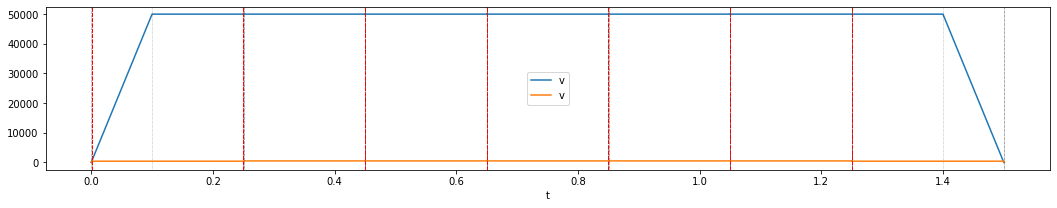

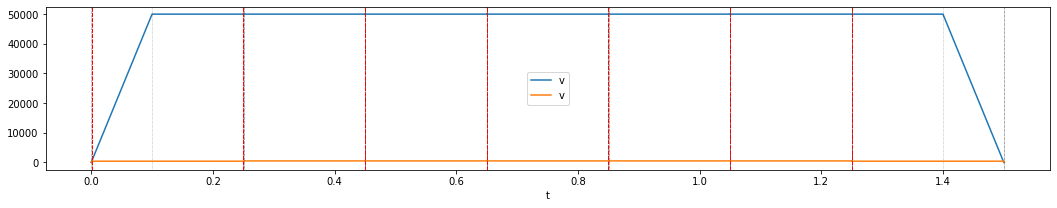

[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Pyp Time:  267175 μs 1323 μs per block
[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-pj']
CPP Time:  11314 μs 56 μs per block


(None, None)

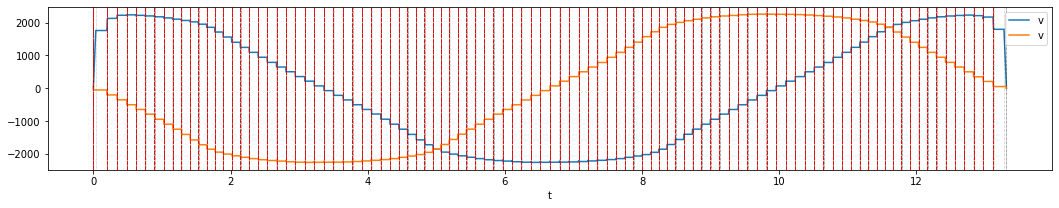

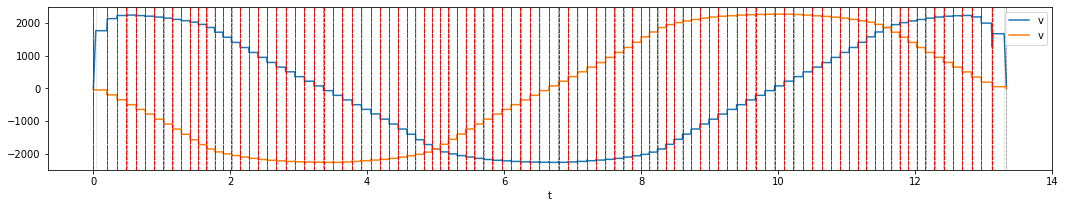

In [10]:
def make_circle(r=5000, n=100):
    from math import sin, cos
   
    moves = []

    r = r
    lx  = 0
    ly = r
    for i in range(0,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 
        
        moves.append((round(x-lx),round(y-ly)))
        
        lx = x
        ly = y
            
    return moves

moves = make_circle(r=5000, n=100)

cp = CPPPlanner(cli_dir)
cp.make()
sl_p, sl_c = cp.compare_planner([j,j], moves, report = False)
sl_p.plot(), sl_c.plot()


In [11]:
cp = CPPPlanner(cli_dir)
cp.make()
l = cp.run_stepper([j,j], moves)

len(l)

[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-s']


2676025

In [12]:
df = pd.DataFrame(l, columns=['t','x','y'])

In [13]:
#
# Runs the stepper test program, which actually just prints
# out the stepepr blocks, and no longer runs the steppers. 
# 

j = Joint(5_000, 50_000)
joints = [j]*2
sl = SegmentList(joints)   
sl.move([1000,500])
sl.move([500,1000])
sl.move([1000,500])
sl.move([500,1000])

ts = TestStepper(cli_dir)
ts.run_stepper(sl)




[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ../../../cmake/src/test/system/stepper
[(0,250,4998)/(4998,750,4998)/(4998,0,4996)] [(0,29,1703)/(1703,259,1703)/(1703,212,4914)] 
[(4996,249,155)/(155,1,155)/(155,249,4996)] [(4914,4,4955)/(4955,992,4955)/(4955,4,4911)] 
[(4996,0,5000)/(5000,1000,5000)/(5000,0,4999)] [(4911,237,625)/(625,17,625)/(625,246,4996)] 
[(4999,222,1664)/(1664,250,1664)/(1664,28,0)] [(4996,0,4998)/(4998,750,4998)/(4998,250,0)] 



[ 13%] Built target libhost
[ 27%] Built target libfastcrc
[ 81%] Built target libplanner
[ 90%] Built target planner
[100%] Built target stepper
Running ['../../../cmake/src/test/system/planner', '-s', '--vtime', '200', '--type', 'R']


(array([2500, 1999]), array([2500, 2000]), 0.313245)

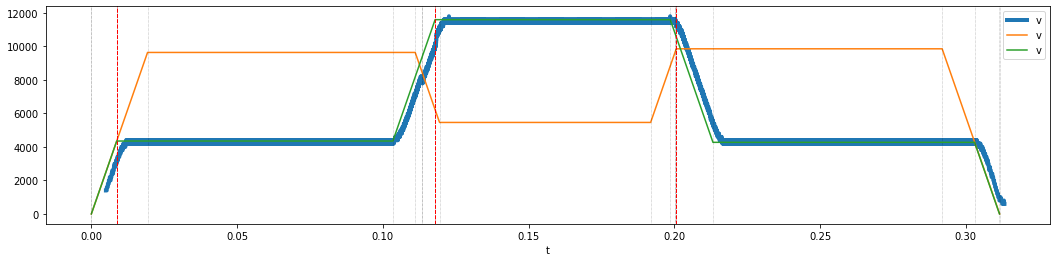

In [19]:
%reload_ext autoreload
%autoreload 2
%run startup.py

LARGE = 1000
small = 500

j = Joint(50000, 500_000)
joints = [j,j]

moves = ([LARGE,small],[small,LARGE], [LARGE,small])

dist = np.array(moves).sum(axis=0)

cp.make()
l = cp.run_stepper(joints, moves)

# cpp program runs on time period of 5us, so mult by 1/5us to get actual velocity
p = 1/(5/1e6)

df = pd.DataFrame(l, columns=['t','x','y'])
df['v'] = df.y.rolling(1000).mean() * p

ax=df.plot('t','v', linewidth=4, figsize=(18,4))


sl = SegmentList(joints)   
[sl.move(m) for m in moves]
sl.plot(ax=ax)

df[['x','y']].sum().values, dist, df.t.max()